In [267]:
from bs4 import BeautifulSoup
import bs4
import time
import os
import pandas as pd
from scipy import stats
import scipy as sc
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import svm
from scipy.special import expit
from scipy.special import logit
import requests
global pages
pd.options.mode.chained_assignment = None
from sklearn.model_selection import cross_val_score



In [268]:
#load Csv (post Crawled) + fix
df = pd.read_csv(r'D:\לימודים יניב\שנה ב\מבוא למדעי הנתונים-שיטות וכלים\Project\DataFrameTeam.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [269]:
#duplicates Check
df = df.drop_duplicates()
#display(df)

In [270]:
for i in df:
    df[i] = df[i].replace('-','0')
#df['Matches lost'].value_counts()

In [271]:
#null Check
df.isnull().value_counts()

#      Clubs  Matches played  Matches won  Matches drawn  Matches lost  Goals for  Goals against  Goal difference  Points  Year 
False  False  False           False        False          False         False      False          False            False   False    586
dtype: int64

In [273]:
#from Team Names to Indexes
teams=df['Clubs'].value_counts().index.tolist() 
dicNew={}
for i in range(len(teams)):
    dicNew[teams[i]]=i+1
df2 = df.replace({"Clubs":dicNew})

In [274]:
#Change Place by 4 groups
df2['Place'] = df2['#']
dicChange={}
x=df2['#'].value_counts().index.tolist()
x=sorted(x,key=int)
x = list(map(int, x))
for i in (x):
    if(i<6):
        dicChange[i]=1
    else:
        dicChange[i]=0
df2['Place'] = list(map(int,df2['Place']))
df2 = df2.replace({'Place':dicChange})



In [104]:
for i in df2:
    if(i!='Year'):
        df2[i] = list(map(int,df2[i]))

In [275]:
X=pd.DataFrame()

In [276]:
#Only the teams with the higest appearance from all the Seasons (6 Teams that played in all the 29 Seasons)
#df_club = df2.drop(df2[df2.Clubs!=3].index)
list_values = []
list_check = ['Goals for','Matches drawn','Goals against','Goal difference','Matches lost']
for i in list_check:
    X[i]=df2[i]
    y=df2['Place']
#x=df2.drop(['Place','Year','Goal difference','Matches played','Matches drawn','Goals against','Points','Matches lost','#','Matches won','Clubs'],axis=1)
#Logistic Linear
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lrm=linear_model.LogisticRegression()
    lrm.fit(X_train,y_train)
    lrm.score(X_test,y_test)
    y_pred = lrm.predict(X)
    X=X.drop(i,axis=1)
    for j in range(-100,150):
        if (lrm.predict([[j]])[0]==1):
            list_values.append(j)
            break
for k in range(len(list_check)):
    print("for the team to be top 5 it has to have atleast",list_values[k],list_check[k])

for the team to be top 5 it has to have atleast 61 Goals for
for the team to be top 5 it has to have atleast -100 Matches drawn
for the team to be top 5 it has to have atleast -100 Goals against
for the team to be top 5 it has to have atleast 17 Goal difference
for the team to be top 5 it has to have atleast -100 Matches lost


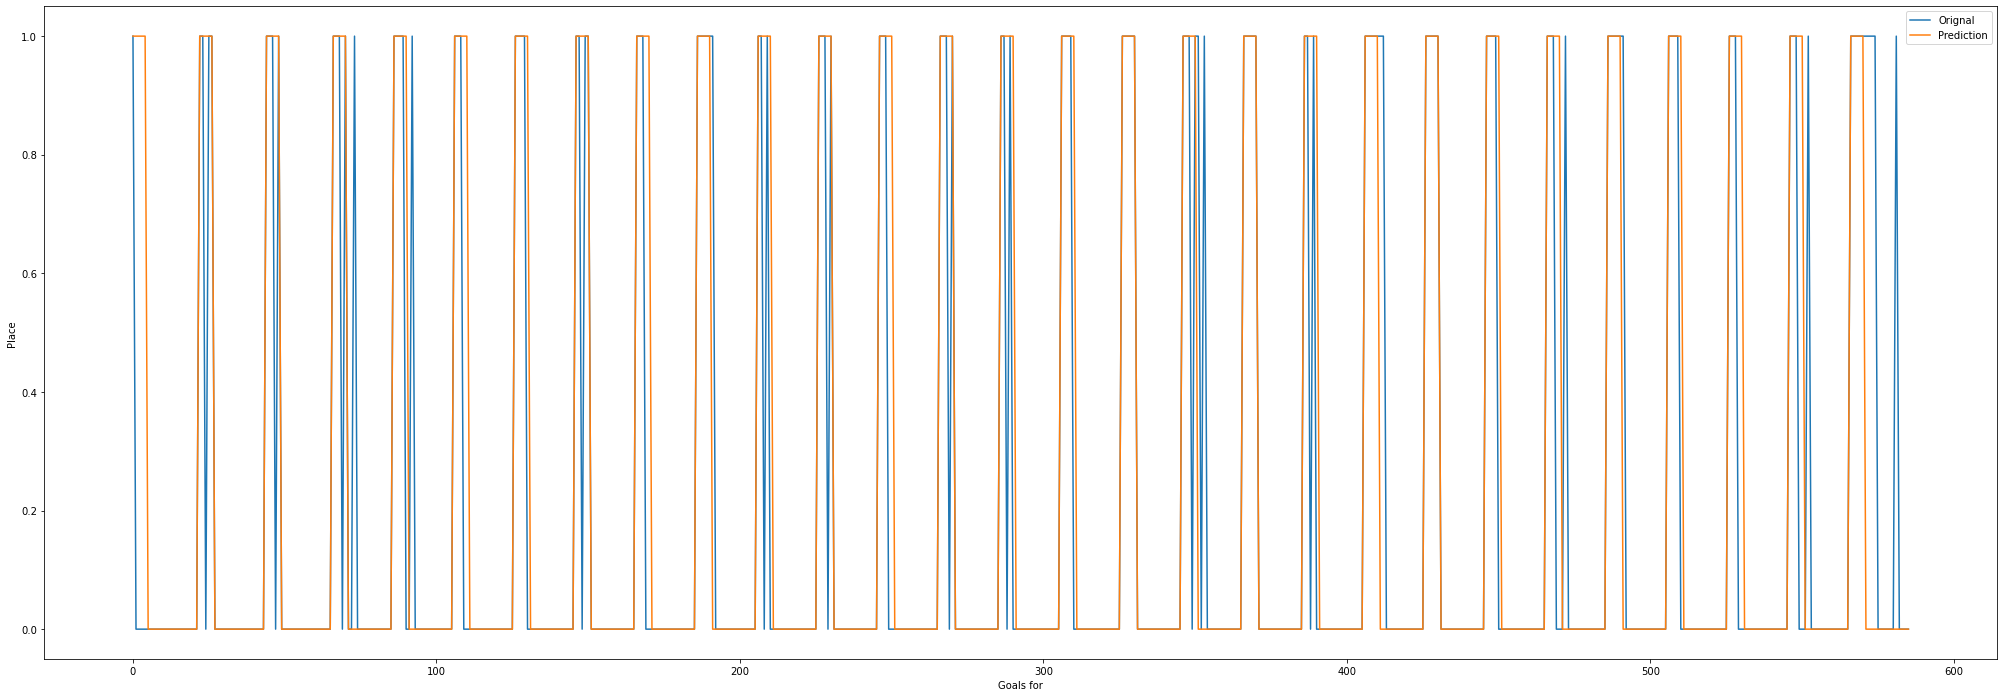

In [277]:
y = np.array(y)
y_pred = np.array(y_pred)
plt.figure(figsize=(35,12))
plt.title("")
plt.xlabel('Goals for')
plt.ylabel('Place')
plt.plot(y_pred)
plt.plot(y)
plt.legend(['Orignal','Prediction'])
plt.show()

In [278]:
df_small = df2.drop(df2[df2.Clubs!=2].index)

#making the x,y
#x=df_small.drop(['Matches won','Goals against','Year','Clubs','Matches played','Matches lost','Points','Goal difference'],axis=1)
x=df_small.drop(['Year','Matches played','Clubs'],axis=1)
y=df_small['Points']

#Logistic Linear
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lrm=linear_model.LogisticRegression()
lrm.fit(X_train,y_train)
y_pred = lrm.predict(x)
y_actual=y
    
print(lrm.score(X_test,y_test))
metrics.confusion_matrix(y_actual, y_pred)
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro'))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
print(list(dicNew.keys())[list(dicNew.values()).index(2)])

0.0
accuracy is: 0.6896551724137931
precision is: 0.6722222222222222
recall is: 0.7083333333333334
f1 is: 0.6448412698412698
Everton


C:\Users\Yaniv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaniv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


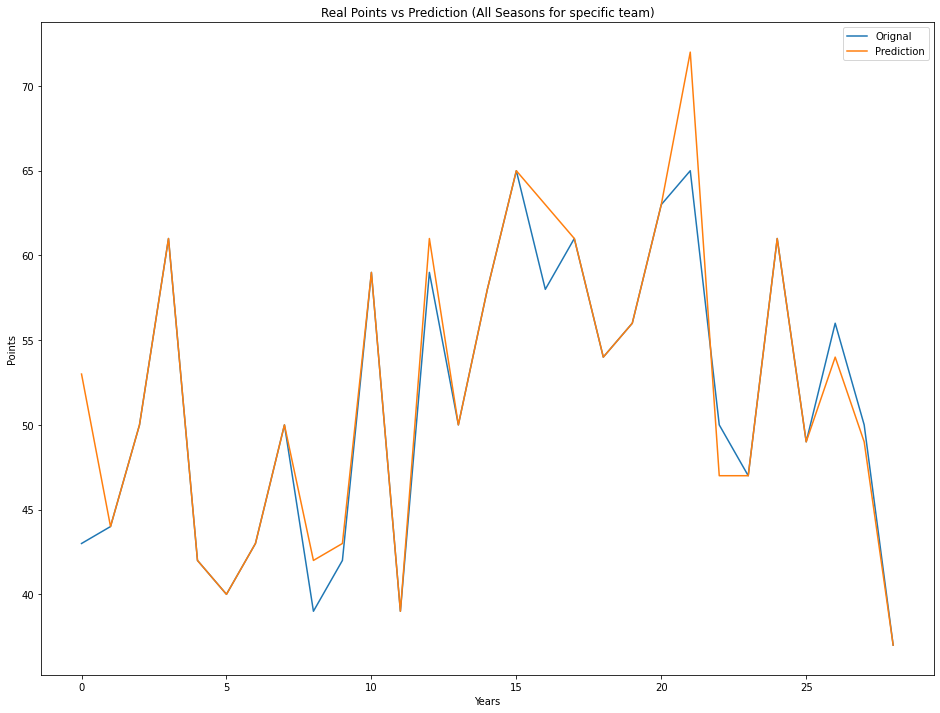

In [279]:
y = np.array(y)
y_pred = np.array(y_pred)
plt.figure(figsize=(16,12))
plt.title("Real Points vs Prediction (All Seasons for specific team)")
plt.xlabel('Years')
plt.ylabel('Points')
plt.plot(y_pred)
plt.plot(y)
plt.legend(['Orignal','Prediction'])
plt.show()


In [280]:
#SVC model
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.predict(x))
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro',zero_division=0))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
name =list(dicNew.keys())[list(dicNew.values()).index(2)]
print(name)

0.0
[50 50 50 61 50 50 50 61 50 50 50 50 50 50 61 61 61 61 61 61 61 61 50 50
 61 50 61 50 50]
accuracy is: 0.6896551724137931
precision is: 0.6722222222222222
recall is: 0.7083333333333334
f1 is: 0.6448412698412698
Everton


In [281]:
#Choosing only one Team that played for all 29 seasons (28, Season29 not finished)
dfMU = df2.drop(df2[df2.Clubs!=2].index)
df_len = len(dfMU)
dfMU.drop(dfMU.tail(1).index,inplace=True)
dfMU



,#,Clubs,Matches played,Matches won,Matches drawn,Matches lost,Goals for,Goals against,Goal difference,Points,Year,Place
12,13,2,42,15,8,19,53,55,-2,53,92/93,0
38,17,2,42,12,8,22,42,63,-21,44,93/94,0
58,15,2,42,11,17,14,44,51,-7,50,94/95,0
71,6,2,38,17,10,11,64,44,20,61,95/96,0
100,15,2,38,10,12,16,44,57,-13,42,96/97,0
122,17,2,38,9,13,16,41,56,-15,40,97/98,0
139,14,2,38,11,10,17,42,47,-5,43,98/99,0
158,13,2,38,12,14,12,59,49,10,50,99/00,0
181,16,2,38,11,9,18,45,59,-14,42,00/01,0
200,15,2,38,11,10,17,45,57,-12,43,01/02,0


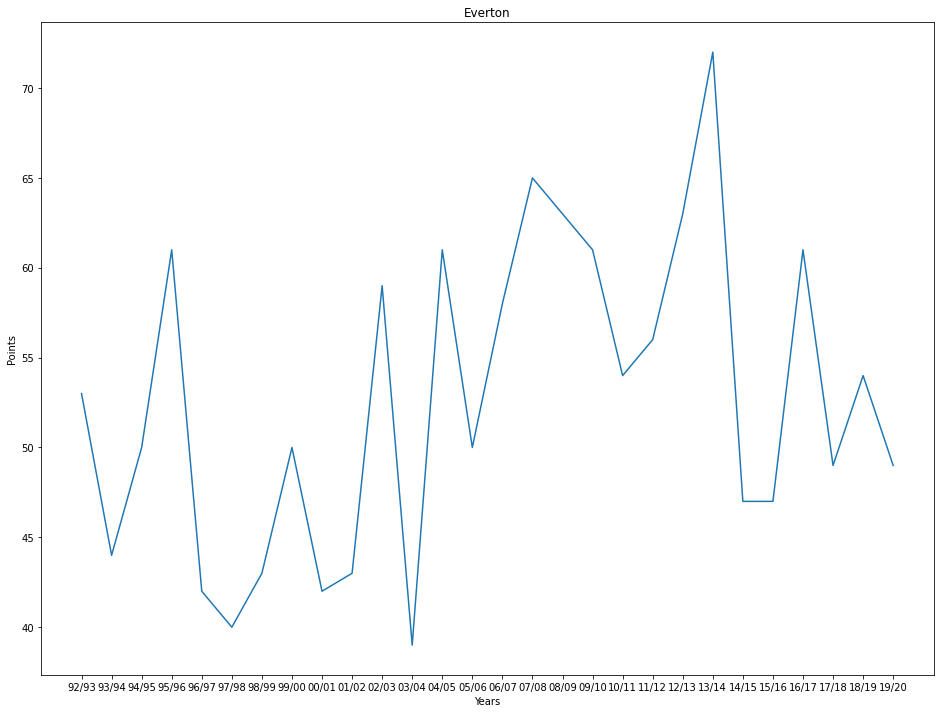

In [282]:
#Visualize the 'Points' data
plt.figure(figsize=(16,12))
plt.title(name)
plt.xlabel('Years')
plt.ylabel('Points')
plt.plot(dfMU['Year'],dfMU['Points'])
plt.show()

In [283]:
#Get The Points
dfMUPre = pd.DataFrame()
dfMUPre['Points'] = dfMU['Points']
display(dfMUPre)

,Points
12,53
38,44
58,50
71,61
100,42
122,40
139,43
158,50
181,42
200,43


In [284]:
#Create a variable to predict 'x' seasons (5)
future_seasons = 7
#Create a new column target
dfMUPre['Prediction'] = dfMUPre[['Points']].shift(-future_seasons)
dfMUPre

,Points,Prediction
12,53,50.0
38,44,42.0
58,50,43.0
71,61,59.0
100,42,39.0
122,40,61.0
139,43,50.0
158,50,58.0
181,42,65.0
200,43,63.0


In [285]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/seasons
X = np.array(dfMUPre.drop(['Prediction'],axis=1))[:-future_seasons]

In [286]:
##Create a target data set (y) and convert it to a numpy array and remove all the values expect last 'x' rows/seasons
y = np.array(dfMUPre['Prediction'])[:-future_seasons]

In [287]:
#Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train,y_train)

In [289]:
#Get the last 'x' row/seasons from the feature data set
x_future = dfMUPre.drop(['Prediction'],1)[:-future_seasons]
x_future = x_future.tail(future_seasons)
x_future = np.array(x_future)

In [290]:
x_future

array([[58],
       [65],
       [63],
       [61],
       [54],
       [56],
       [63]], dtype=int64)

In [291]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print("tree model  ",tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print("linear model",lr_prediction)

tree model   [72.  48.  48.  57.5 49.  54.  48. ]
linear model [55.45032408 57.02882848 56.57782722 56.12682596 54.54832156 54.99932282
 56.57782722]


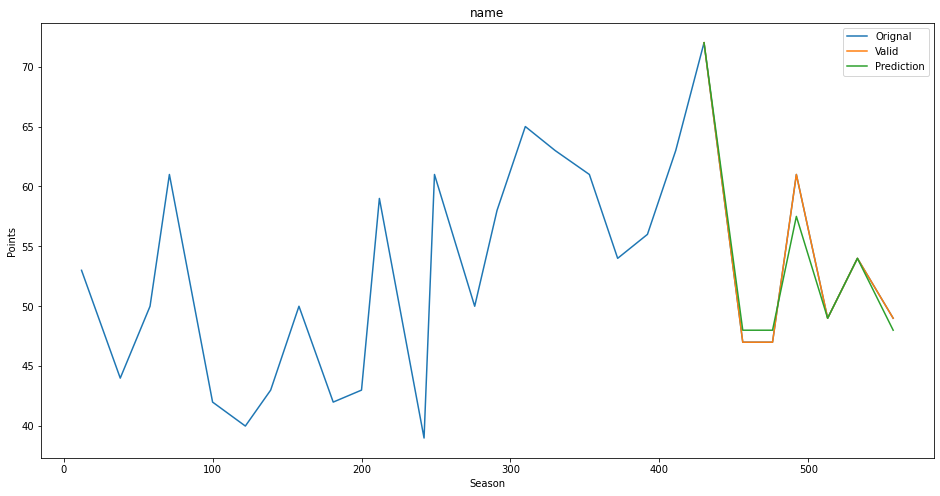

In [292]:
#Visualize the data with Tree model
predictions = tree_prediction
valid = dfMUPre[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('name')
plt.xlabel('Season')
plt.ylabel('Points')
plt.plot(dfMUPre['Points'])
plt.plot(valid[['Points','Prediction']])
plt.legend(['Orignal', 'Valid', 'Prediction'])
plt.show()
#print("r2_score prediction=",metrics.r2_score(y_test, predictions)*100,"%")

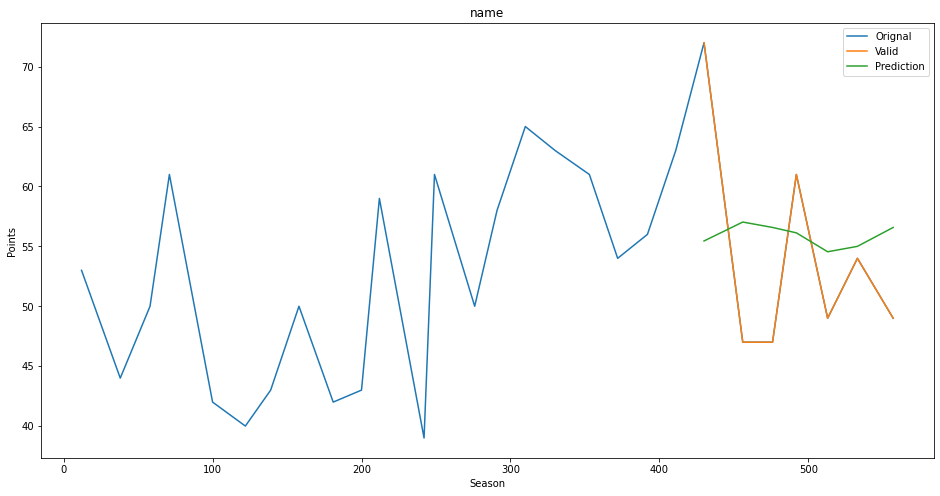

In [293]:
#Visualize the data with Linear regression model
predictions = lr_prediction
valid = dfMUPre[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('name')
plt.xlabel('Season')
plt.ylabel('Points')
plt.plot(dfMUPre['Points'])
plt.plot(valid[['Points','Prediction']])
plt.legend(['Orignal', 'Valid', 'Prediction'])
plt.show()
#print("r2_score prediction=",metrics.r2_score(y_test, predictions)*100,"%")

In [294]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.450904517751765
Mean Squared Error: 69.80987484176326
Root Mean Squared Error: 8.35523038831146


In [295]:
print("linear pre=",lr_prediction)
print("tree pre=",tree_prediction)
valid

linear pre= [55.45032408 57.02882848 56.57782722 56.12682596 54.54832156 54.99932282
 56.57782722]
tree pre= [72.  48.  48.  57.5 49.  54.  48. ]


,Points,Prediction
430,72,55.450324
456,47,57.028828
476,47,56.577827
492,61,56.126826
513,49,54.548322
533,54,54.999323
557,49,56.577827


In [296]:
#Linear model prediction accuracy
x=0
total_accuracy=0
print("Linear model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(lr_prediction[x]*100)/i
    x+=1
print(total_accuracy/future_seasons ,"%")

Linear model prediction accuracy
105.62578205674552 %


In [297]:
#tree model prediction accuracy
x=0
total_accuracy=0
print("tree model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(tree_prediction[x]*100)/i
    x+=1
print(total_accuracy/future_seasons,"%")

tree model prediction accuracy
99.4966854149104 %


In [298]:
#Cross validation
csX = df2[['Goals for','Points']]
csY = df2['Place']
X_train, X_test, y_train, y_test = train_test_split(csX, csY, test_size=0.3, random_state=42)


In [299]:
X_train.shape , y_train.shape

((410, 2), (410,))

In [300]:
X_test.shape , y_test.shape

((176, 2), (176,))

In [301]:
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
clf.score(X_test,y_test)

0.9545454545454546

In [302]:
clf.score(X_train,y_train)

0.9585365853658536

In [303]:
clf = SVC(kernel='linear',C=1)
scores = cross_val_score(clf, csX,csY, cv=5)
scores

array([0.95762712, 0.98290598, 0.94017094, 0.96581197, 0.93162393])

In [304]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.96 (+/- 0.04)


In [305]:
#Linear Regression for all the seasons , prediciting the final teams place
dfLinear = pd.DataFrame()
dfLinear = df2.drop(['#','Year','Place','Matches played'],axis=1)
dfLinear = dfLinear[:566]
y=df2['#'][:566]
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.3, random_state=42)
dfln = LinearRegression().fit(X_train,y_train)
dfln.score(X_test,y_test)
y_pred = dfln.predict(dfLinear)


In [306]:
print("score:",dfln.score(X_test,y_test))
print("explained_variance_score:", metrics.explained_variance_score(y, y_pred,multioutput='uniform_average'))

score: 0.8981320460111295
explained_variance_score: 0.8914558296853435


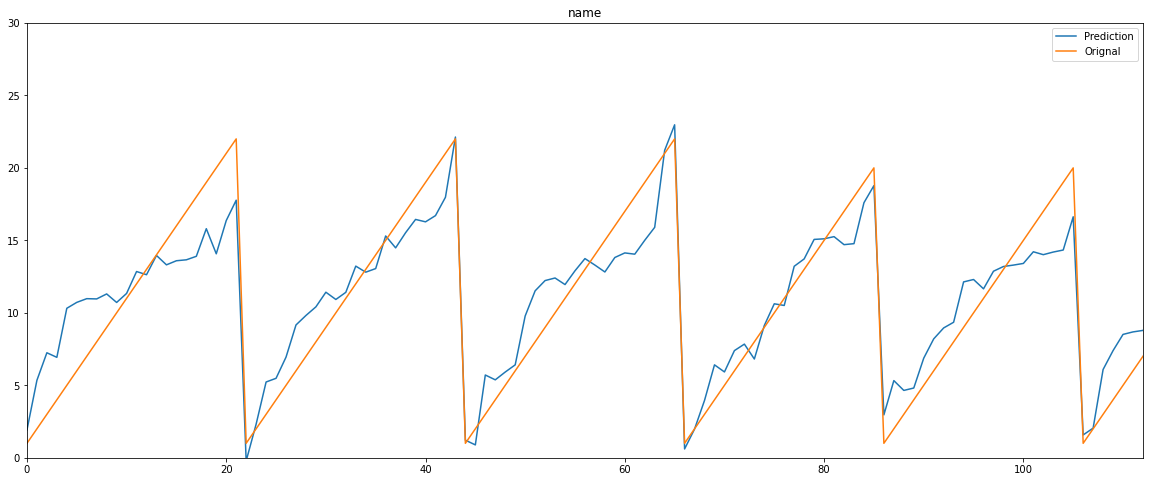

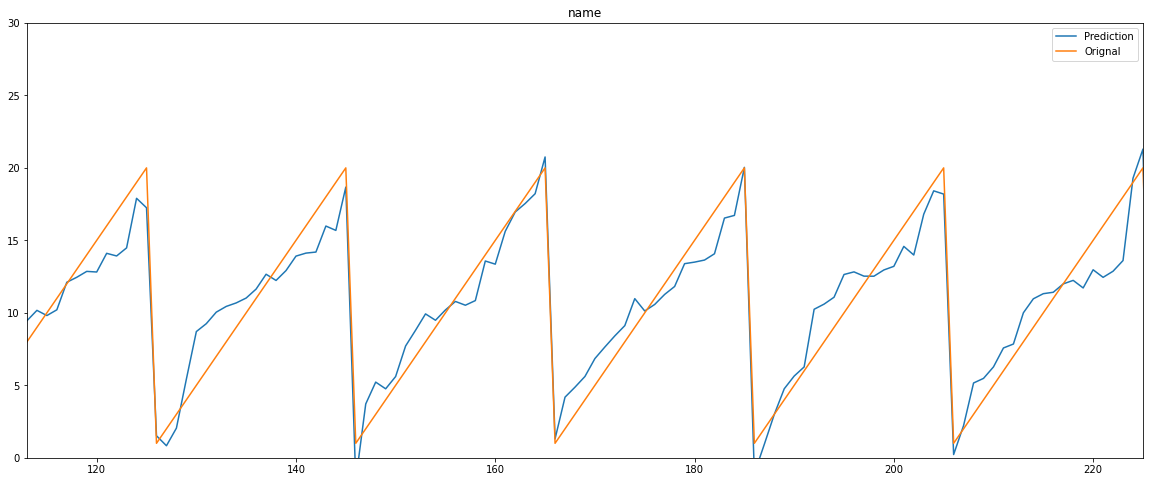

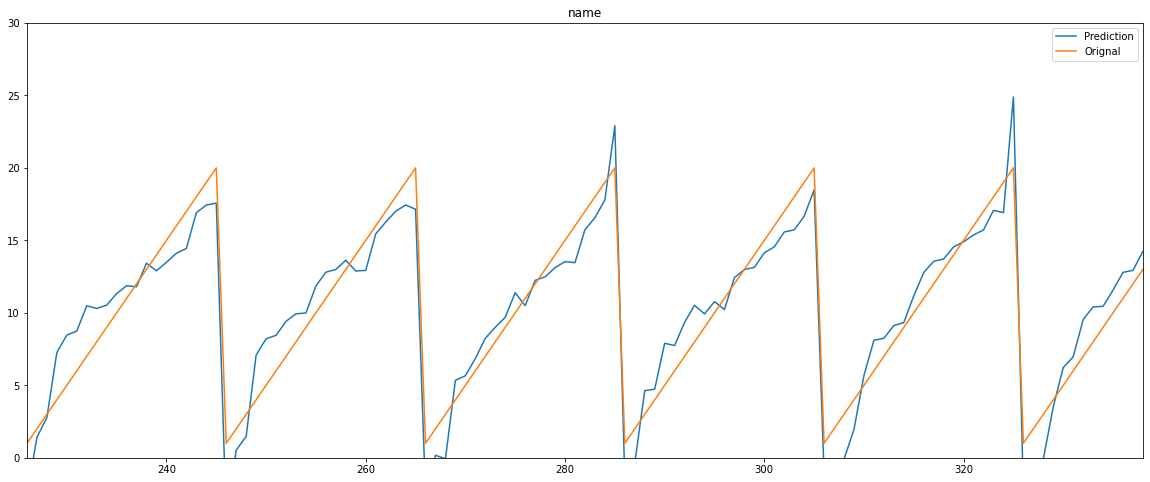

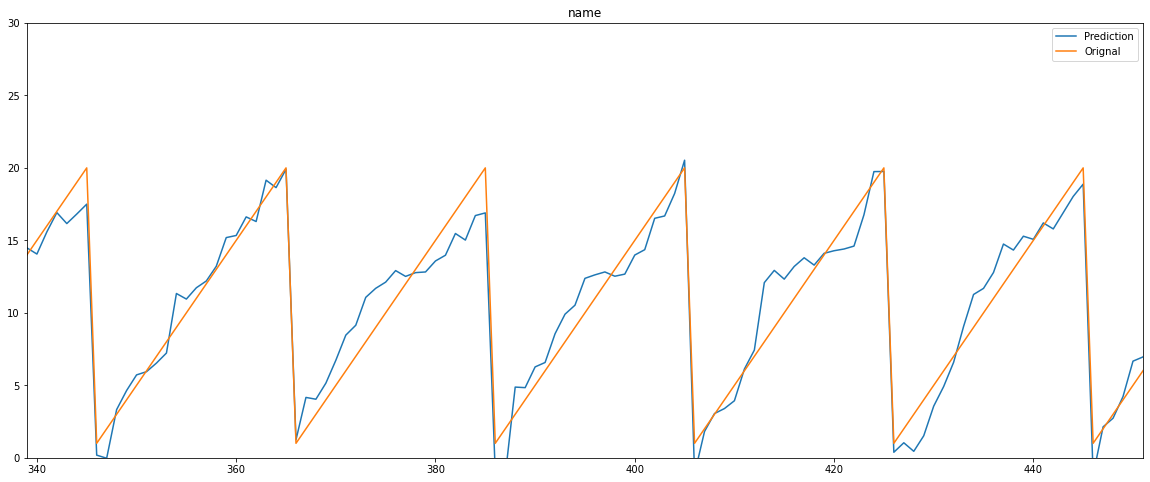

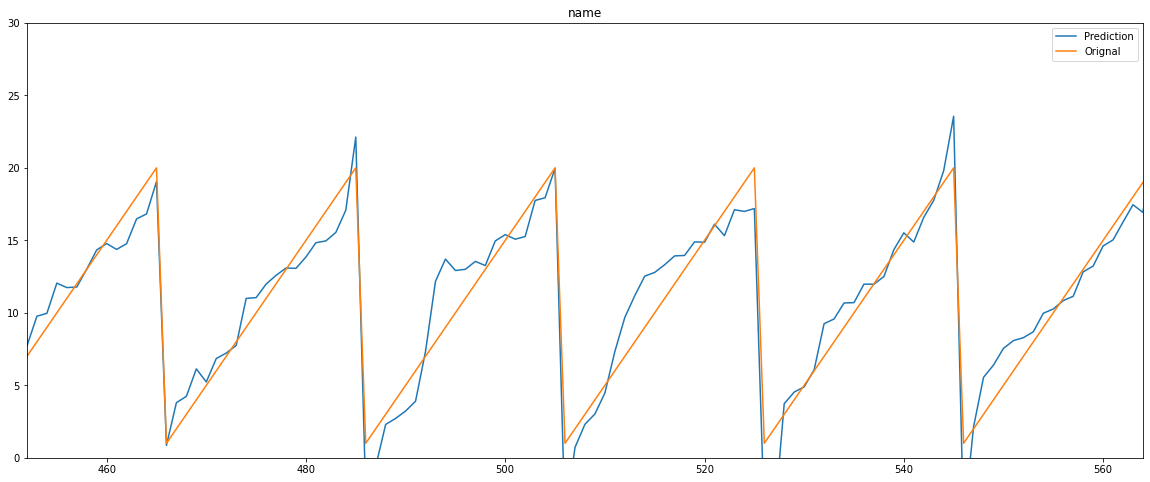

In [307]:
YY = df2['#']
x=113
for i in range(5):
    plt.figure(figsize=(20,8))
    plt.title('name')
    plt.xlabel('')
    plt.ylabel('')
    plt.plot(y_pred)
    plt.plot(YY)
    plt.xlim(x*i,x+(x*i-1))
    plt.ylim(0,30)
    plt.legend(['Prediction','Orignal'])
    plt.show()



In [308]:
#Dicision Tree Regression for all the seasons , prediciting the final teams place
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.3, random_state=42)
tree = DecisionTreeRegressor().fit(X_train,y_train)
print(tree.score(X_test,y_test))
print("explained_variance_score:", metrics.explained_variance_score(y, y_pred,multioutput='uniform_average'))
y_pred = tree.predict(dfLinear)


0.9037223997530162
explained_variance_score: 0.8914558296853435


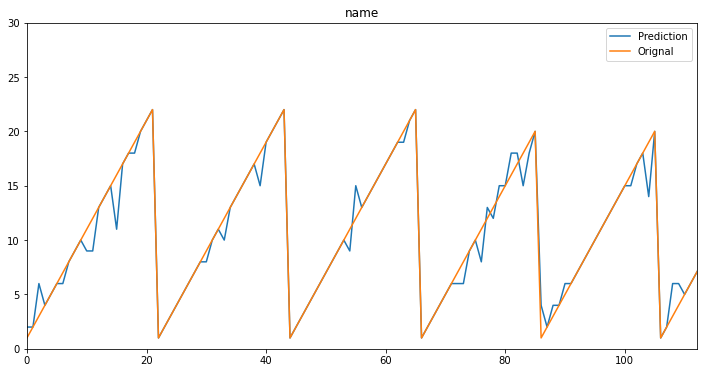

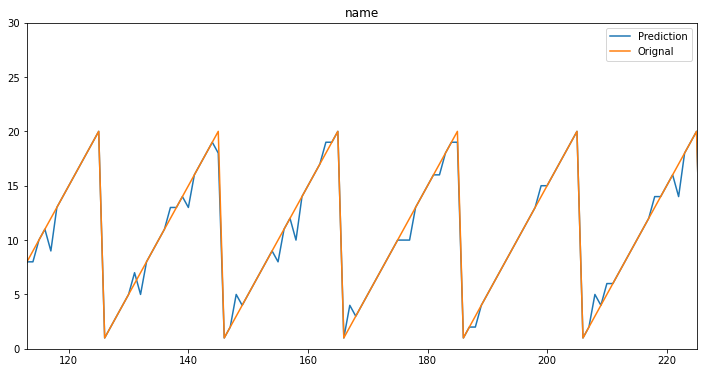

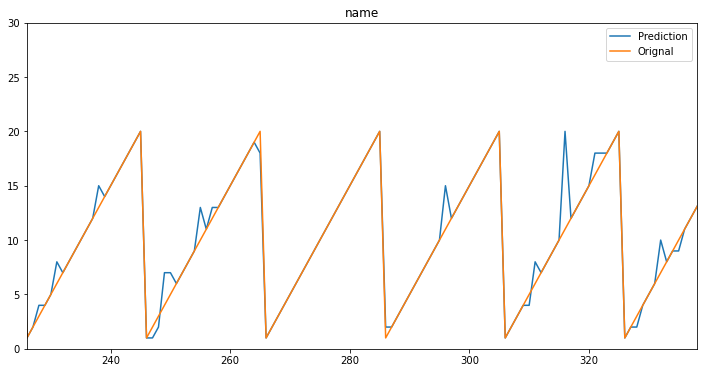

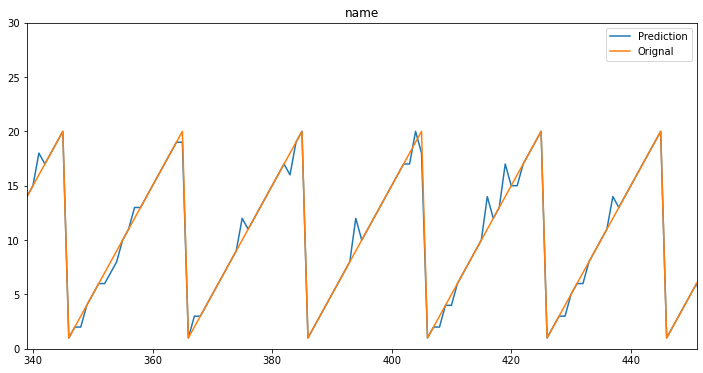

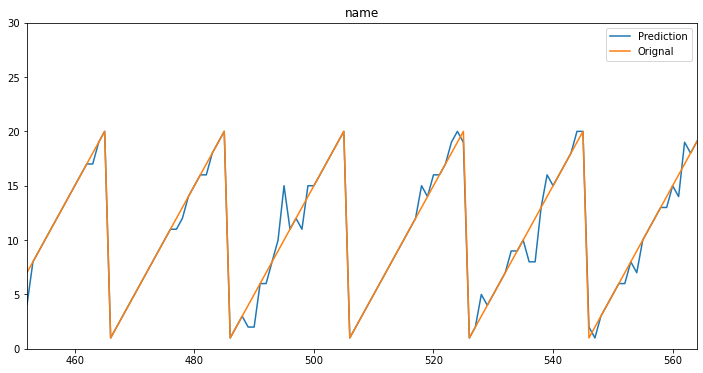

In [309]:
YY = df2['#']
x=113
for i in range(5):
    plt.figure(figsize=(12,6))
    plt.title('name')
    plt.xlabel('')
    plt.ylabel('')
    plt.plot(y_pred)
    plt.plot(YY)
    plt.xlim(x*i,x+(x*i-1))
    plt.ylim(0,30)
    plt.legend(['Prediction','Orignal'])
    plt.show()